C:\Users\Administrator\AppData\Local\Temp\ipykernel_3376\3906747015.py:103: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['总分'])


<Axes: xlabel='总分', ylabel='Density'>

findfont: Font family '微软黑体' not found.
findfont: Font family '微软黑体' not found.
findfont: Font family '微软黑体' not found.
findfont: Font family '微软黑体' not found.
findfont: Font family '微软黑体' not found.
findfont: Font family '微软黑体' not found.
findfont: Font family '微软黑体' not found.
findfont: Font family '微软黑体' not found.
d:\python\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from current font.
  func(*args, **kwargs)
d:\python\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  func(*args, **kwargs)
findfont: Font family '微软黑体' not found.
findfont: Font family '微软黑体' not found.
findfont: Font family '微软黑体' not found.
findfont: Font family '微软黑体' not found.
findfont: Font family '微软黑体' not found.
findfont: Font family '微软黑体' not found.
findfont: Font family '微软黑体' not found.
findfont: Font family '微软黑体' not found.
findfont: Font family '微软黑体' not

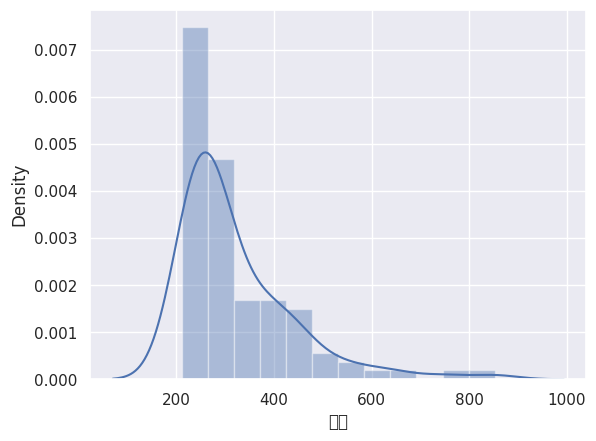

In [13]:
import pandas as pd
import numpy as np

from pathlib import Path

file = Path(r"C:\Users\Administrator\Desktop\pandas进阶修炼")

df = pd.read_excel(file.joinpath("2020年中国大学排名.xlsx"))
df

## 1 - 查看数据  查看数据前 10 行
df.head(10)

## 2 - 修改索引 数据已经按照降序排列，让 学校 当索引会更好一点 -> 修改索引为 学校名称 列
df.set_index('学校名称', inplace=True)

## 3 - 查看数据量
df.shape
df.size
# 1400
# (100, 14)

## 4 - 数据排序 将数据按照总分升序排列，并展示前20个学校
# df.sort_values('总分').head(20)
df.sort_values('总分', ascending=False).tail(20)

## 5 - 数据排序 将数据按照 高端人才得分 降序排序，展示前 10 位
# df.sort_values('高端人才得分', ascending=False).head(10)
df.nlargest(10, '高端人才得分')

## 6 - 分列排名 查看各项得分最高的学校名称
df.iloc[:,3:].idxmax()

## 7 - 统计信息｜均值
# 计算总分列的均值
df['总分'].mean()

# 8 - 统计信息｜中位数
# 计算总分列的中位数
df['总分'].median()

# 9 - 统计信息｜众数
# 计算总分列的众数
df['总分'].mode()

# 10 -统计信息｜部分
# 计算 总分、高端人才得分、办学层次得分的最大最小值、中位数、均值
df.agg({
        "总分": ["min", "max", "median", "mean"],
        "高端人才得分": ["min", "max", "median", "mean"],
        "办学层次得分":["min", "max", "median", "mean"]})

# 11 - 统计信息｜完整
# 查看数值型数据的统计信息（均值、分位数等），并保留两位小数
df.describe().round(2).T

# 12 - 统计信息｜分组
# 计算各省市总分均值
df.groupby('省市')['总分'].mean()

# 13 - 统计信息｜相关系数
# 也就是相关系数矩阵，也就是每两列之间的相关性系数
df.iloc[:, 3:].corr()

# 14 - 相关系数｜热力图
# 方法1
df.iloc[:, 3:].corr().style.background_gradient(cmap='coolwarm')
# 方法2
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize = (9,6),dpi=100)
# sns.set(font='Songti SC')
# sns.heatmap(df.iloc[:, 3:].corr().round(2),annot=True,cmap='RdBu')
# plt.show()

# 15 - 统计信息｜频率
# 计算各省市出现的次数
df.省市.value_counts()

# 16 - 统计信息｜热力地图
# 结合 pyecharts 将各省市高校上榜数量进行地图可视化

from pyecharts import options as opts
from pyecharts.charts import Map
list1 = list(pd.DataFrame(df.省市.value_counts()).index)
list2 = list(pd.DataFrame(df.省市.value_counts()))

c = (
    Map()
    .add('', [list(z) for z in zip(list1,list2)], "china",is_map_symbol_show=False)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="排名前100高校各省市占比"),
        visualmap_opts=opts.VisualMapOpts(max_=20),
    )
)
c.render_notebook()

# 17 - 统计信息｜直方图
# 绘制总分的直方图、密度估计图
import seaborn as sns
# sns.set(font='微软黑体')
sns.distplot(df['总分'])

# 2 个 pandas EDA 插件
# 在 pandas 之外，还有两个插件可以快速实现 EDA

# 下面不作为习题，仅供介绍，感兴趣可以进一步搜索了解

# 执行全部代码即可获得 EDA 报告！